In [1]:
# Import the packages
import pandas as pd 
pd.set_option('display.max_columns', 500)
from sklearn.linear_model import LogisticRegression, LinearRegression, ARDRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn import svm


In [2]:
df = pd.read_parquet("dataset_dsba.parquet.gzip")
df.sample(5)

,product,location,date,volume,type,brand,is_holiday
924864,189,18,2020-07-27,1.664869,49,2,0.0
922514,180,15,2019-07-08,0.000000,49,14,0.0
838962,357,19,2018-04-16,0.867282,19,16,0.0
200589,438,18,2016-12-26,0.000000,87,7,1.0
505317,250,9,2020-04-27,0.000000,32,4,2.0


In [3]:
m = df.groupby(pd.Grouper(key='date', axis=0, freq='M')).sum()
m

,product,location,volume,type,brand,is_holiday
date,,,,,,
2015-12-31,679391,41860,1285.591426,110003,13140,0.0
2016-01-31,2833652,173517,12996.455604,454477,54525,0.0
2016-02-29,3688826,224165,16322.771395,583019,70074,0.0
2016-03-31,3026260,183068,12745.148088,473688,56892,0.0
2016-04-30,3072874,185960,13744.143427,478381,57585,0.0
2016-05-31,3915684,237932,15919.880243,611615,73466,0.0
2016-06-30,3162636,193307,12947.265491,500305,59497,0.0
2016-07-31,3169464,193700,13054.888196,501336,59636,0.0
2016-08-31,3969126,242470,15861.705503,627126,74929,0.0


Text(0, 0.5, 'Volume')

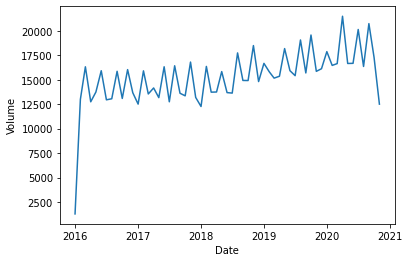

In [4]:
plt.plot(m.index, m["volume"])
plt.xlabel("Date")
plt.ylabel("Volume")

In [5]:
df.describe()         # sum, or total

,product,location,volume,type,brand,is_holiday
count,1.090189e+06,1.090189e+06,1.090189e+06,1.090189e+06,1.090189e+06,1.090189e+06
mean,2.541894e+02,1.499398e+01,8.266783e-01,4.157758e+01,4.995354e+00,2.002515e-01
std,1.480405e+02,9.168389e+00,2.585843e+00,2.608953e+01,3.761501e+00,4.839503e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.390000e+02,7.000000e+00,0.000000e+00,1.900000e+01,3.000000e+00,0.000000e+00
50%,2.450000e+02,1.500000e+01,2.602615e-01,3.700000e+01,4.000000e+00,0.000000e+00
75%,3.810000e+02,2.400000e+01,1.048249e+00,7.000000e+01,5.000000e+00,0.000000e+00
max,5.170000e+02,2.900000e+01,1.821083e+02,9.300000e+01,1.700000e+01,2.000000e+00


In [6]:
p = df.groupby(['brand',"product"]).sum()
p

location       volume    type  is_holiday
brand product                                           
0     4           86436  2840.854001  423360      1152.0
      25          53172  3280.913442  158760       672.0
      26          51912  2306.582697  121212       624.0
      28          83160  4473.916578  223776      1152.0
      29          84546  6308.213893  420420      1248.0
...                 ...          ...     ...         ...
16    367         16236   508.130515   75768       273.0
      370         16072   362.654918   36408       234.0
      448          5250   128.309179   11100        36.0
17    232          7056   194.484696    2380        85.0
      234          6692   178.560247    2240        80.0

[518 rows x 4 columns]

In [7]:
# plt.plot(p.index[1], p["volume"])
# plt.xlabel("Date")
# plt.ylabel("Volume")

# Attempt #2 Time Series

In [8]:
filtered_df = df.loc[(df['date'] >= '2020-09-01') & (df['date'] < '2020-09-15')]
filtered_df

,product,location,date,volume,type,brand,is_holiday
245,258,18,2020-09-07,5.685590,5,3,0.0
246,258,18,2020-09-14,5.674907,5,3,0.0
497,258,24,2020-09-07,1.316475,5,3,0.0
498,258,24,2020-09-14,0.000000,5,3,0.0
749,258,25,2020-09-07,1.540947,5,3,0.0
...,...,...,...,...,...,...,...
1089676,346,17,2020-09-14,0.931354,37,4,0.0
1089927,346,19,2020-09-07,1.144980,37,4,0.0
1089928,346,19,2020-09-14,1.794420,37,4,0.0
1090179,346,29,2020-09-07,1.341780,37,4,0.0


In [9]:
yr = df.groupby(pd.Grouper(key='date', axis=0, freq='W')).sum()
yr

,product,location,volume,type,brand,is_holiday
date,,,,,,
2016-01-03,679391,41860,1285.591426,110003,13140,0.0
2016-01-10,694799,42744,2866.298887,111994,13332,0.0
2016-01-17,712951,43591,3333.967114,114161,13731,0.0
2016-01-24,712951,43591,3040.622920,114161,13731,0.0
2016-01-31,712951,43591,3755.566682,114161,13731,0.0
...,...,...,...,...,...,...
2020-09-27,1576675,91983,4254.925609,261853,32674,0.0
2020-10-04,1576694,92010,4489.848775,261945,32688,0.0
2020-10-11,1585666,92680,4294.002428,263873,32893,0.0


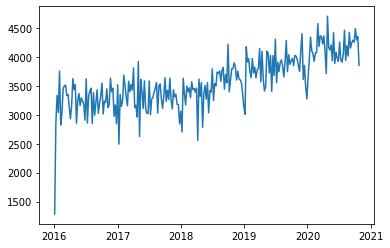

In [10]:
plt.plot(yr.index, yr["volume"])

In [11]:
yr.head()

,product,location,volume,type,brand,is_holiday
date,,,,,,
2016-01-03,679391,41860,1285.591426,110003,13140,0.0
2016-01-10,694799,42744,2866.298887,111994,13332,0.0
2016-01-17,712951,43591,3333.967114,114161,13731,0.0
2016-01-24,712951,43591,3040.622920,114161,13731,0.0
2016-01-31,712951,43591,3755.566682,114161,13731,0.0


In [26]:
df = yr
yr.volume.diff
df["volume"] = yr.volume.diff
df
#plt.plot(yr.index, yr["volume"])

AttributeError: 'function' object has no attribute 'values'

In [13]:
X_train = yr.drop(['volume'], axis = 1)
y_train = yr.loc[:'2020', 'volume']
X_test = yr['2020'].drop(['volume'], axis = 1)
y_test = yr.loc['2020', 'volume']

In [14]:
models = []
models.append(('AR', ARDRegression()))
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []

In [15]:
from sklearn.model_selection import TimeSeriesSplit
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=10)

    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='neg_root_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

AR: -291.681412 (101.030813)
LR: -408.349951 (297.166206)
NN: -375.699303 (128.962611)
KNN: -275.530843 (52.621051)
RF: -258.001707 (36.090757)
SVR: -423.343998 (168.896652)


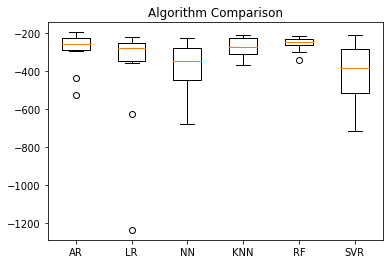

In [16]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# Lets find the parameters for RF model

In [17]:
import sklearn.metrics as metrics
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = metrics.make_scorer(rmse, greater_is_better = False)

In [18]:
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [19]:
print(best_score, best_model)

-263.7608173652532 RandomForestRegressor(max_depth=14, max_features='log2', n_estimators=20)


In [20]:
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    mean_squared_percentafe_error = absk.
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [21]:
y_pred = best_model.predict(X_test)
regression_results(y_test, y_pred)

explained_variance:  0.7176
mean_squared_log_error:  0.0008
r2:  0.7172
MAE:  94.8184
MSE:  14189.3905
RMSE:  119.1192


ValueError: x and y must have same first dimension, but have shapes (252,) and (43,)

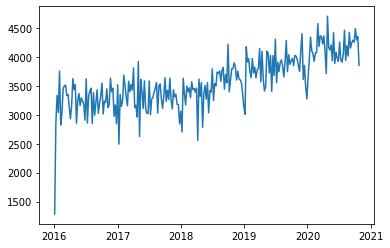

In [22]:
plt.plot(yr.index, yr["volume"])
plt.plot(yr.index, y_pred)
